In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import math
import seaborn as sb

In [2]:
df = pd.read_csv('heart_Disease.csv')
df.info()
# for column in df.select_dtypes(include = 'number'):
#   unique_values = df[column].unique()
#   print(f"Column: {column}, Unique Values: {unique_values}")
# print(df.isna().sum())
df.nunique()
meanlist = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for column in df.columns:
    if column in meanlist:
      df[column] = df[column].fillna(df[column].mean().round(2))

df['education'].fillna(df['education'].mode()[0], inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace = True)
print(df.isna().sum())
df.to_csv('updated_file.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
male         

C:\Users\NUTAN KUMAR\AppData\Local\Temp\ipykernel_22196\2576000649.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace = True)
C:\Users\NUTAN KUMAR\AppData\Local\Temp\ipykernel_22196\2576000649.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [3]:
uf = pd.read_csv('updated_file.csv')
uf.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [4]:
x = uf.drop(['HeartDisease'], axis = 1)
y = uf['HeartDisease']
print(y.value_counts())
x = x.to_numpy()
y = y.to_numpy()
print("Shape of X: ", x.shape)
print("Shape of Y: ", y.shape)

HeartDisease
0    3594
1     644
Name: count, dtype: int64
Shape of X:  (4238, 15)
Shape of Y:  (4238,)


In [5]:
x_train , rem_x, y_train, rem_y = train_test_split(x,y,test_size=0.3,random_state=40)
val_x, test_x, val_y, test_y = train_test_split(rem_x, rem_y, test_size=0.5, random_state=40)


In [6]:
def sigmoid(z):
    exponential_neg=np.exp(-z)
    exponential_pos=np.exp(z)
    return np.where(z >= 0, 1 / (1 + exponential_neg), exponential_pos/ (1 + exponential_pos))

In [7]:
# GRADED FUNCTION: compute_cost
def compute_cost(X, Y, w, b, lambda_=1):

    m = X.shape[0]

    # Compute the linear combination of inputs and weights
    dot_product=np.dot(X,w)
    z = dot_product + b
    # Apply the sigmoid function to all elements in z
    g = sigmoid(z)

    lv = (-Y * np.log(g+1e-10))
    rv = ((1 - Y) * np.log(1 - g+1e-10))
    total_cost = lv - rv

    # Take the average cost over all examples
    total_cost = np.mean(total_cost)

    return total_cost


In [8]:
def compute_gradient_function(X, Y, w, b):
    m, n = X.shape

    # Compute the model predictions 
    dot_product=np.dot(X,w)
    z_wb = dot_product + b
    f_wb = sigmoid(z_wb)

    # Compute gradients (vectorized)
    error = f_wb - Y
    error_sum=np.sum(error)
    dj_db = error_sum / m
    error_dot_prod=np.dot(X.T, error)
    dj_dw =  error_dot_prod/ m
    
    return dj_db, dj_dw


In [9]:
def predict(X, weights, bias):
    dot_prod=np.dot(X,weights)
    probabilities = sigmoid(dot_prod + bias)
    return (probabilities >= 0.5).astype(int)

def calculate_accuracy(predictions, y_true):
    predicted_labels = np.where(predictions >= 0.5, 1, 0)
    correct_predictions = np.sum(predicted_labels == y_true)
    accuracy = correct_predictions / len(y_true)
    return accuracy

In [11]:
import math

def gradient_descent_function(X, Y, val_x, val_y,initial_weights, initial_bias, compute_cost, compute_gradients, learning_rate, num_iterations, regularization_param):
    # Number of training examples
    num_samples = len(X)

    # Lists to store cost and weights at each iteration
    cost_history = []
    weights_history = []
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    # Initialize weights and bias
    weights = initial_weights
    bias = initial_bias

    # Iterate through the number of iterations
    for iteration in range(num_iterations):
        # Compute the gradients
        gradient_bias, gradient_weights = compute_gradients(X, Y, weights, bias)

        # Update parameters
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        train_cost = compute_cost(X, Y, weights, bias, regularization_param)
        val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

        # Compute and store accuracies
        train_predictions = predict(X, weights, bias)
        val_predictions = predict(val_x, weights, bias)

        train_accuracy = calculate_accuracy(train_predictions, Y)
        val_accuracy = calculate_accuracy(val_predictions, val_y)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)


        # Print the cost and weights at intervals
        if iteration % math.ceil(num_iterations // 10) == 0 or iteration == (num_iterations - 1):
            weights_history.append(weights)
            print(f"Iteration {iteration:4}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")
    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history


In [12]:

np.random.seed(1)
initial_w = np.zeros(x.shape[1])
initial_b = 0


# Some gradient descent settings
iterations = 10000
alpha = 0.0001

w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function(x_train ,y_train, val_x, val_y,initial_w, initial_b,
                                   compute_cost, compute_gradient_function, alpha, iterations, 0)

x_train_prediction = predict(x_train, w, b)
val_train_prediction = predict(val_x, w, b)
print("Model Accuracy On Training Data:",accuracy_score(y_train,x_train_prediction)*100,"%")
print("Model Accuracy On Validation Data:",accuracy_score(val_y,val_train_prediction)*100,"%")
print("FINAL MODEL WEIGHTS:", w)
print("FINAL BIAS:", b)
print("ALPHA:", alpha)



Iteration    0: Train Cost 0.5554, Val Cost 0.6202, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 1000: Train Cost 0.4115, Val Cost 0.4438, Train Accuracy 0.8517, Val Accuracy 0.8349
Iteration 2000: Train Cost 0.4094, Val Cost 0.4402, Train Accuracy 0.8506, Val Accuracy 0.8365
Iteration 3000: Train Cost 0.4088, Val Cost 0.4391, Train Accuracy 0.8503, Val Accuracy 0.8365
Iteration 4000: Train Cost 0.4085, Val Cost 0.4386, Train Accuracy 0.8510, Val Accuracy 0.8381
Iteration 5000: Train Cost 0.4083, Val Cost 0.4383, Train Accuracy 0.8513, Val Accuracy 0.8381
Iteration 6000: Train Cost 0.4082, Val Cost 0.4381, Train Accuracy 0.8513, Val Accuracy 0.8381
Iteration 7000: Train Cost 0.4081, Val Cost 0.4378, Train Accuracy 0.8510, Val Accuracy 0.8381
Iteration 8000: Train Cost 0.4079, Val Cost 0.4377, Train Accuracy 0.8510, Val Accuracy 0.8381
Iteration 9000: Train Cost 0.4078, Val Cost 0.4375, Train Accuracy 0.8510, Val Accuracy 0.8381
Iteration 9999: Train Cost 0.4077, Val Cost 0.4374

In [13]:
def plot_loss_and_accuracy(train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history):

    plt.figure(figsize=(15, 5))

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_cost_history, label='Training Loss', color='blue')
    plt.plot(val_cost_history, label='Validation Loss', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss vs. Iteration')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
    plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy vs. Iteration')
    plt.legend()

    # Adjust layout
    plt.grid(True)
    plt.tight_layout()
    plt.show()

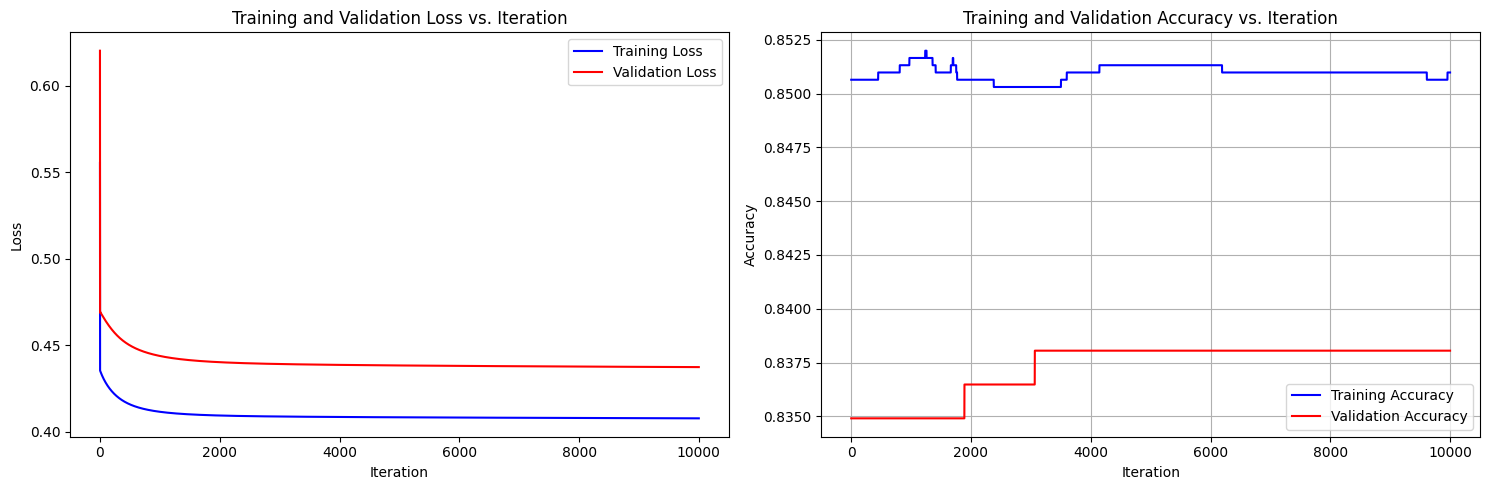

In [14]:
plot_loss_and_accuracy(train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history)


compare the performance of the model with different
feature scaling methods: Min-max scaling

In [15]:
# PART B

# Function to apply Min-Max scaling
def min_max_scaling(x):
    x_min = x.min(axis=0)
    x_max = x.max(axis=0)
    x_scaled = (x - x_min) / (x_max - x_min)
    return x_scaled, x_min, x_max

# reading the updated dataset
uf = pd.read_csv('updated_file.csv')

x = uf.drop(['HeartDisease'], axis = 1)
y = uf['HeartDisease']
x = x.to_numpy()
y = y.to_numpy()

x, x_min, x_max = min_max_scaling(x)

x_train , rem_x, y_train, rem_y = train_test_split(x,y,test_size=0.3,random_state=40)
val_x, test_x, val_y, test_y = train_test_split(rem_x, rem_y, test_size=0.5, random_state=40)

np.random.seed(1)
initial_w = np.zeros(x.shape[1])
initial_b = 0



iterations = 10000
alpha = 0.1

w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function(x_train ,y_train, val_x, val_y,initial_w, initial_b,
                                   compute_cost, compute_gradient_function, alpha, iterations, 0)

x_train_prediction = predict(x_train, w, b)
val_train_prediction = predict(val_x, w, b)
print("Model Accuracy On Training Data:",accuracy_score(y_train,x_train_prediction)*100,"%")
print("Model Accuracy On Validation Data:",accuracy_score(val_y,val_train_prediction)*100,"%")
print("FINAL MODEL WEIGHTS:", w)
print("FINAL BIAS:", b)
print("ALPHA:", alpha)



Iteration    0: Train Cost 0.6678, Val Cost 0.6690, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 1000: Train Cost 0.3963, Val Cost 0.4281, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 2000: Train Cost 0.3885, Val Cost 0.4198, Train Accuracy 0.8517, Val Accuracy 0.8365
Iteration 3000: Train Cost 0.3850, Val Cost 0.4153, Train Accuracy 0.8527, Val Accuracy 0.8381
Iteration 4000: Train Cost 0.3832, Val Cost 0.4126, Train Accuracy 0.8537, Val Accuracy 0.8396
Iteration 5000: Train Cost 0.3821, Val Cost 0.4107, Train Accuracy 0.8540, Val Accuracy 0.8412
Iteration 6000: Train Cost 0.3814, Val Cost 0.4094, Train Accuracy 0.8543, Val Accuracy 0.8412
Iteration 7000: Train Cost 0.3809, Val Cost 0.4083, Train Accuracy 0.8540, Val Accuracy 0.8412
Iteration 8000: Train Cost 0.3805, Val Cost 0.4075, Train Accuracy 0.8537, Val Accuracy 0.8412
Iteration 9000: Train Cost 0.3803, Val Cost 0.4067, Train Accuracy 0.8533, Val Accuracy 0.8412
Iteration 9999: Train Cost 0.3800, Val Cost 0.4061

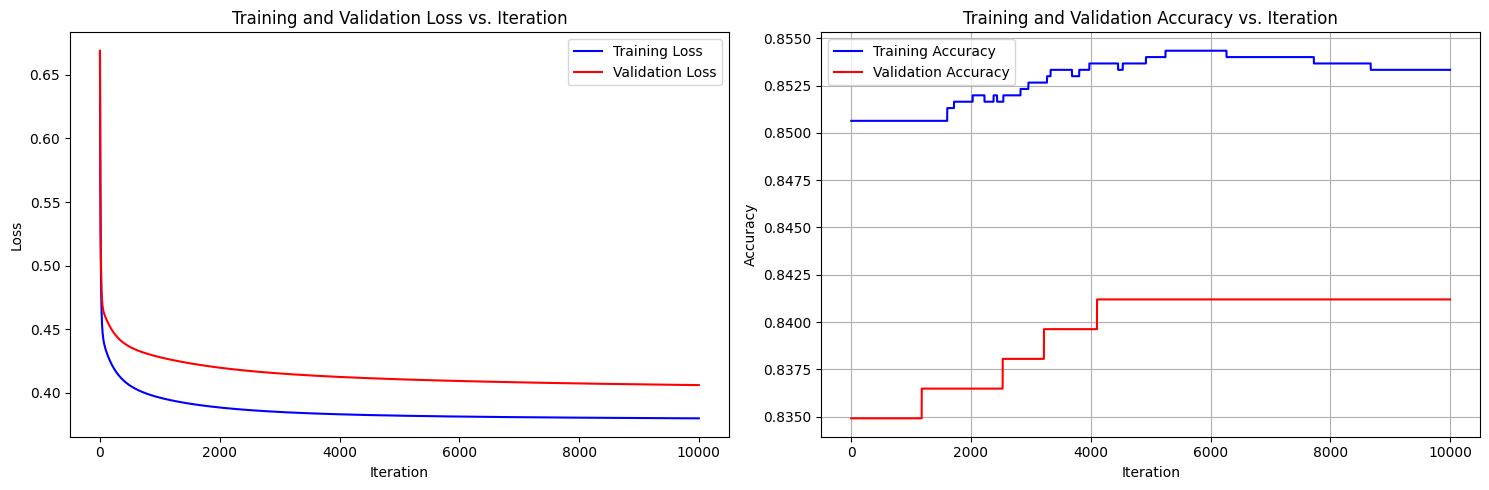

In [16]:
plot_loss_and_accuracy(train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history)

 Observation with feature scaling and without feature scaling
 It's possible for the loss function to exhibit such behavior—fluctuating and sometimes increasing or decreasing unpredictably—when the data is not scaled. This can occur due to several reasons related to the properties of gradient descent and the nature of the data:

 If the learning rate is too high, the updates to the weights can overshoot, causing the loss to fluctuate or even increase. Scaling the data can help stabilize the learning process by making gradients more consistent.

C:\Users\NUTAN KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


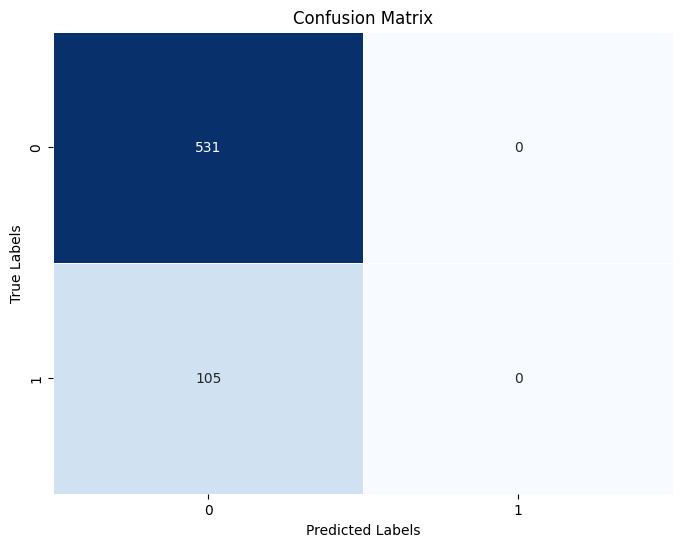

Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.5000
[[531   0]
 [105   0]]


In [18]:
import seaborn as sb
val_predictions = predict(val_x, w, b)

# val_predictions_binary = (val_predictions >= 0.5).astype(int)

cm = confusion_matrix(val_y, val_predictions)

precision = precision_score(val_y, val_predictions)
recall = recall_score(val_y, val_predictions)
f1 = f1_score(val_y, val_predictions)
roc_auc = roc_auc_score(val_y, val_predictions)

plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Printing the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(cm)


Implementing and comparing the following optimisation algorithms: Stochas-
tic Gradient Descent and Mini-Batch Gradient Descent (with varying batch sizes,

at least 2).

In [28]:
def compute_gradient_sgd(X, Y, w, b, index):

    x_i = X[index]
    y_i = Y[index]

    # Compute the prediction (forward pass)
    z_wb = np.dot(w, x_i) + b
    f_wb = sigmoid(z_wb)

    # Compute the gradient for bias
    dj_db = f_wb - y_i

    # Compute the gradient for weights
    dj_dw = (f_wb - y_i) * x_i

    return dj_db, dj_dw


#     return total_cost

def gradient_descent_function(X, Y, val_x, val_y,initial_weights, initial_bias, compute_cost, compute_gradient_sgd, learning_rate, num_iterations, regularization_param):
    # Number of training examples
    num_samples = len(X)

    # Lists to store cost and weights at each iteration
    cost_history = []
    weights_history = []
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    # Initialize weights and bias
    weights = initial_weights
    bias = initial_bias

    # Iterate through the number of iterations
    for iteration in range(num_iterations):
        # Compute the gradients
        idx = np.random.randint(num_samples)

        # Compute the gradients using SGD
        gradient_bias, gradient_weights = compute_gradient_sgd(X, Y, weights, bias, idx)

        # Update parameters
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        train_cost = compute_cost(X, Y, weights, bias, regularization_param)
        val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

        # Compute and store accuracies
        train_predictions = predict(X, weights, bias)
        val_predictions = predict(val_x, weights, bias)
        train_accuracy = calculate_accuracy(train_predictions, Y)
        val_accuracy = calculate_accuracy(val_predictions, val_y)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        # Compute and store the cost
        if iteration < 100000:  # Prevent excessive resource usage
            cost = compute_cost(X, Y, weights, bias, regularization_param)
            cost_history.append(cost)

        # Print the cost and weights at intervals
        if iteration % math.ceil(num_iterations // 10) == 0 or iteration == (num_iterations - 1):
            weights_history.append(weights)
            print(f"Iteration {iteration:4}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")
    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

np.random.seed(1)
initial_w = np.zeros(x.shape[1])
initial_b = 0


# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function(x_train ,y_train, val_x, val_y,initial_w, initial_b,
                                   compute_cost, compute_gradient_sgd, alpha, iterations, 0)

x_train_prediction = predict(x_train, w, b)
val_train_prediction = predict(val_x, w, b)
print("Model Accuracy On Training Data:",accuracy_score(y_train,x_train_prediction)*100,"%")
print("Model Accuracy On Validation Data:",accuracy_score(val_y,val_train_prediction)*100,"%")
print("FINAL MODEL WEIGHTS:", w)
print("FINAL BIAS:", b)
print("ALPHA:", alpha) 


Iteration    0: Train Cost 0.6968, Val Cost 0.6966, Train Accuracy 0.1494, Val Accuracy 0.1651
Iteration 1000: Train Cost 0.4376, Val Cost 0.4626, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 2000: Train Cost 0.4250, Val Cost 0.4506, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 3000: Train Cost 0.4154, Val Cost 0.4445, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 4000: Train Cost 0.4111, Val Cost 0.4414, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 5000: Train Cost 0.4068, Val Cost 0.4351, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 6000: Train Cost 0.4039, Val Cost 0.4318, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 7000: Train Cost 0.4026, Val Cost 0.4297, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 8000: Train Cost 0.3999, Val Cost 0.4285, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 9000: Train Cost 0.4000, Val Cost 0.4276, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 9999: Train Cost 0.3989, Val Cost 0.4264

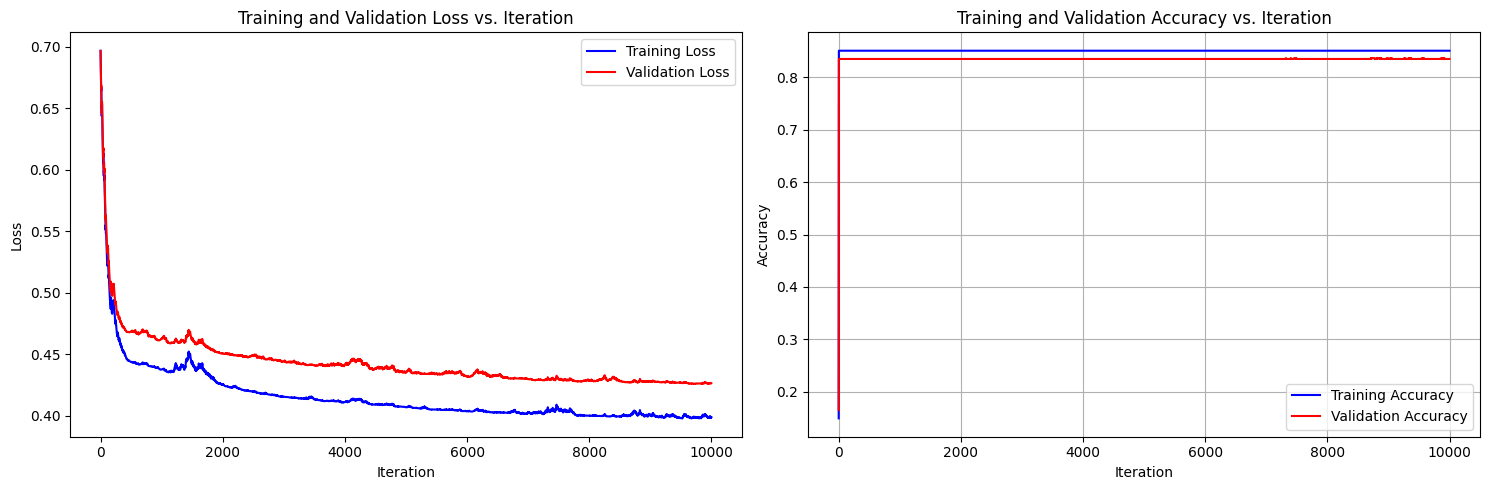

In [29]:
plot_loss_and_accuracy(train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history)

Mini-Batch Gradient Descent (with varying batch sizes,

at least 2).

In [39]:
def compute_gradient_minibatch(X_batch, Y_batch, w, b):
    # Number of examples in the mini-batch
    m = len(X_batch)

    # Compute model predictions for the entire mini-batch (vectorized)
    z_wb = np.dot(X_batch, w) + b
    f_wb = sigmoid(z_wb)

    # Compute the error (vectorized)
    error = f_wb - Y_batch

    # Compute the gradients (vectorized)
    dj_dw = np.dot(X_batch.T, error) / m  # Gradient with respect to weights
    dj_db = np.sum(error) / m             # Gradient with respect to bias

    return dj_db, dj_dw

def prepare_batches(X, Y, batch_size):
    num_samples = len(Y)

    # Initialize lists to hold batches
    X_batches = []
    Y_batches = []

    # Shuffle data
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]

    # Create batches
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        X_batch = X[start:end]
        Y_batch = Y[start:end]
        X_batches.append(X_batch)
        Y_batches.append(Y_batch)

    return X_batches, Y_batches

def mini_batch_gradient_descent(X, Y, val_x, val_y, initial_weights, initial_bias, compute_cost, compute_gradient, learning_rate, num_iterations, batch_size, regularization_param):
    # Number of training examples
    num_samples = X.shape[0]

    # Lists to store cost and accuracy histories
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    # Initialize weights and bias
    weights = initial_weights
    bias = initial_bias

    # Iterate through the number of iterations
    for iteration in range(num_iterations):
        # Prepare batches
        X_batches, Y_batches = prepare_batches(X, Y, batch_size)

        # Process each mini-batch
        for X_batch, Y_batch in zip(X_batches, Y_batches):
            # Compute the gradients using the mini-batch
            gradient_bias, gradient_weights = compute_gradient(X_batch, Y_batch, weights, bias)

            # Update parameters
            weights -= learning_rate * gradient_weights
            bias -= learning_rate * gradient_bias

        # Compute and store costs for training and validation sets at the end of each epoch
        if (iteration + 1) % math.ceil(num_iterations / 10) == 0 or iteration == (num_iterations - 1):
            train_cost = compute_cost(X, Y, weights, bias, regularization_param)
            val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
            train_cost_history.append(train_cost)
            val_cost_history.append(val_cost)

            # Compute and store accuracies
            train_predictions = predict(X, weights, bias)
            val_predictions = predict(val_x, weights, bias)
            train_accuracy = calculate_accuracy(train_predictions, Y)
            val_accuracy = calculate_accuracy(val_predictions, val_y)
            train_accuracy_history.append(train_accuracy)
            val_accuracy_history.append(val_accuracy)

            # Print the cost and weights at intervals
            print(f"Iteration {iteration + 1:4}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

np.random.seed(1)
initial_w = np.zeros(x.shape[1])
initial_b = 0


# Some gradient descent settings
iterations = 10000
alpha = 0.1

w, b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = mini_batch_gradient_descent(X=x_train, Y=y_train, val_x=val_x, val_y=val_y,
            initial_weights=initial_w, initial_bias=initial_b, compute_cost=compute_cost, compute_gradient=compute_gradient_function, learning_rate=alpha, num_iterations=iterations, batch_size=600,regularization_param=0
)

x_train_prediction = predict(x_train, w, b)
val_train_prediction = predict(val_x, w, b)
print("Model Accuracy On Training Data:",accuracy_score(y_train,x_train_prediction)*100,"%")
print("Model Accuracy On Validation Data:",accuracy_score(val_y,val_train_prediction)*100,"%")
print("FINAL MODEL WEIGHTS:", w)
print("FINAL BIAS:", b)
print("Alpha:", alpha)



Iteration 1000: Train Cost 0.3821, Val Cost 0.4107, Train Accuracy 0.8540, Val Accuracy 0.8412
Iteration 2000: Train Cost 0.3800, Val Cost 0.4061, Train Accuracy 0.8533, Val Accuracy 0.8412
Iteration 3000: Train Cost 0.3793, Val Cost 0.4042, Train Accuracy 0.8543, Val Accuracy 0.8412
Iteration 4000: Train Cost 0.3789, Val Cost 0.4033, Train Accuracy 0.8554, Val Accuracy 0.8396
Iteration 5000: Train Cost 0.3787, Val Cost 0.4028, Train Accuracy 0.8557, Val Accuracy 0.8412
Iteration 6000: Train Cost 0.3786, Val Cost 0.4025, Train Accuracy 0.8564, Val Accuracy 0.8412
Iteration 7000: Train Cost 0.3785, Val Cost 0.4023, Train Accuracy 0.8567, Val Accuracy 0.8412
Iteration 8000: Train Cost 0.3785, Val Cost 0.4023, Train Accuracy 0.8567, Val Accuracy 0.8412
Iteration 9000: Train Cost 0.3784, Val Cost 0.4022, Train Accuracy 0.8567, Val Accuracy 0.8412
Iteration 10000: Train Cost 0.3784, Val Cost 0.4022, Train Accuracy 0.8554, Val Accuracy 0.8412
Model Accuracy On Training Data: 85.5360755225893

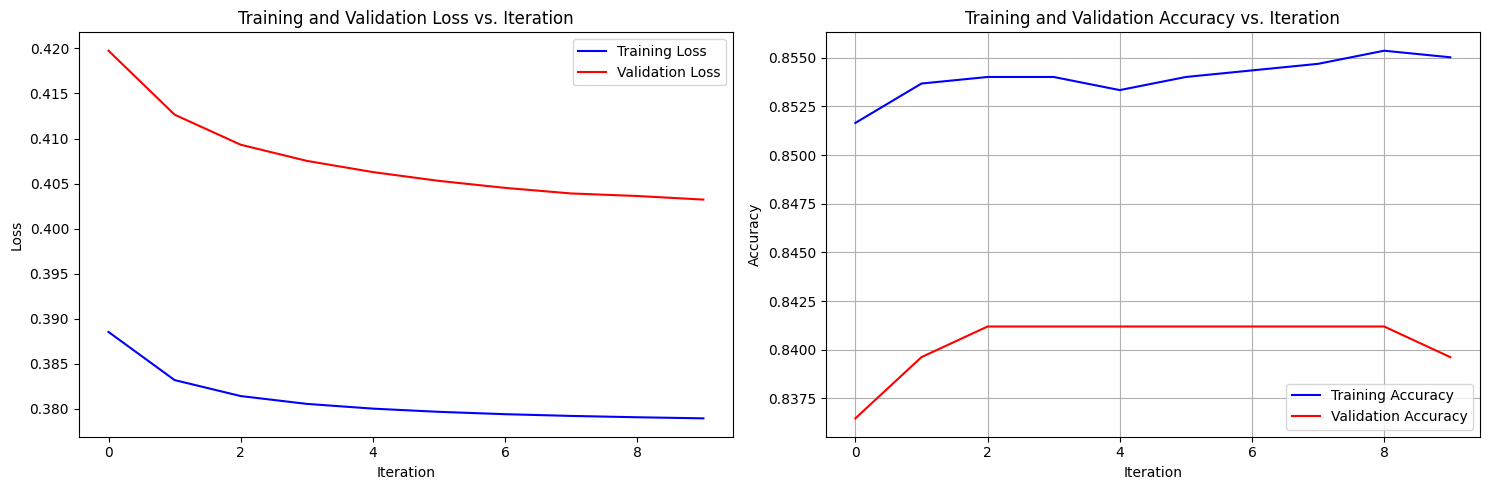

In [38]:
plot_loss_and_accuracy(train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history)

In [17]:
def gradient_descent_function(X, Y, val_x, val_y,initial_weights, initial_bias, compute_cost, compute_gradients, learning_rate, num_iterations, regularization_param):
    # Number of training examples
    num_samples = len(X)

    # Lists to store cost and weights at each iteration
    cost_history = []
    weights_history = []
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    # Initialize weights and bias
    weights = initial_weights
    bias = initial_bias

    # Iterate through the number of iterations
    for iteration in range(num_iterations):
        # Compute the gradients
        gradient_bias, gradient_weights = compute_gradients(X, Y, weights, bias)

        # Update parameters
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        train_cost = compute_cost(X, Y, weights, bias, regularization_param)
        val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

        # Compute and store accuracies
        train_predictions = predict(X, weights, bias)
        val_predictions = predict(val_x, weights, bias)

        train_accuracy = calculate_accuracy(train_predictions, Y)
        val_accuracy = calculate_accuracy(val_predictions, val_y)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)


        # Print the cost and weights at intervals
        if iteration % math.ceil(num_iterations // 10) == 0 or iteration == (num_iterations - 1):
            weights_history.append(weights)
            print(f"Iteration {iteration:4}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")
    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
# Assuming X is the feature set and Y is the labels (use consistent naming)
# X = np.random.rand(4238, 15)  # Example: 4238 samples, 10 features
# Y = np.random.randint(0, 2, 4238)  # Example: Binary labels for classification
uf = pd.read_csv('updated_file.csv')
x = uf.drop(['HeartDisease'], axis = 1)
y = uf['HeartDisease']
X = x.to_numpy()
Y = y.to_numpy()

val_precision = []
val_recall = []
val_f1 = []
val_roc_auc = []
val_accuracy=[]

def kfold(folds,x,y):
    num_of_samples=x.shape[0]
    sizes=num_of_samples//folds
    inital_index=[]
    
    curr_size=0
    remainder = num_of_samples % folds 
    for i in range(folds):
        start_idx = curr_size
        curr_size += sizes + (1 if i < remainder else 0) 
        inital_index.append([start_idx, curr_size - 1])
    for k in range(folds):
        print("For Fold: ",k+1)
        start_ind=inital_index[k][0]
        end_ind=inital_index[k][1]
        val_x=x[start_ind:end_ind+1]
        val_y=y[start_ind:end_ind+1]
        x_train = np.empty((0, x.shape[1]))
        y_train= []
        y_train = np.array([])
        for itr in range(folds):
            if(itr==k):
                continue
            else:
                s=inital_index[itr][0]
                e=inital_index[itr][1]
                new_sample_x=x[s:e+1]
                new_sample_y=y[s:e+1]
                x_train=np.vstack((x_train,new_sample_x))
                #train_y=train_y.extend(new_sample_y)
                y_train = np.hstack((y_train, new_sample_y))
                #train_y=np.vstack((train_y,new_sample_y))
        print(len(val_x))
        print(len(x_train))

        initial_w = np.zeros(x_train.shape[1])
        initial_w = np.random.randn(x_train.shape[1]) * 0.01
        initial_b = 0
        iterations = 10000
        alpha = 0.0000015
        w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function(x_train ,y_train, val_x, val_y,initial_w, initial_b,
                                      compute_cost, compute_gradient_function, alpha, iterations, 0)
        print("w are:",w)
        print("b is",b)
        val_predictions = predict(val_x, w, b)
        accuracy = accuracy_score(val_y, val_predictions)
        val_accuracy.append(accuracy)
        precision = precision_score(val_y, val_predictions)
        recall = recall_score(val_y, val_predictions, zero_division=0)
        f1 = f1_score(val_y, val_predictions, zero_division=0)
        roc_auc = roc_auc_score(val_y, val_predictions)
        val_precision.append(precision)
        val_recall.append(recall)
        val_f1.append(f1)
        val_roc_auc.append(roc_auc)
    
        print(f"Accuracy: {accuracy:.4f}\n") 

kfold(5,X,Y)

mean_val_accuracy = np.mean(val_accuracy)
mean_val_precision = np.mean(val_precision)
mean_val_recall = np.mean(val_recall)
mean_val_f1 = np.mean(val_f1)
mean_val_roc_auc = np.mean(val_roc_auc)

std_val_accuracy = np.std(val_accuracy)
std_val_precision = np.std(val_precision)
std_val_recall = np.std(val_recall)
std_val_f1 = np.std(val_f1)
std_val_roc_auc = np.std(val_roc_auc)

print("Accuracy: ", val_accuracy, "Mean: ", mean_val_accuracy, "Standard deviation: ", std_val_accuracy)
print("Precision: ", val_precision, "Mean: ", mean_val_precision, "Standard deviation: ", std_val_precision)
print("Recall: ", val_recall, "Mean: ", mean_val_recall, "Standard deviation: ", std_val_recall)
print("F1 score: ", val_f1, "Mean: ", mean_val_f1, "Standard deviation: ", std_val_f1)
print("ROC-AUC score: ", val_roc_auc, "Mean: ", mean_val_roc_auc, "Standard deviation: ", std_val_roc_auc)


For Fold:  1
848
3390
Iteration    0: Train Cost 0.6571, Val Cost 0.6689, Train Accuracy 0.6584, Val Accuracy 0.6085
Iteration 1000: Train Cost 0.4228, Val Cost 0.4692, Train Accuracy 0.8534, Val Accuracy 0.8325
Iteration 2000: Train Cost 0.4216, Val Cost 0.4674, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 3000: Train Cost 0.4205, Val Cost 0.4659, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 4000: Train Cost 0.4197, Val Cost 0.4645, Train Accuracy 0.8522, Val Accuracy 0.8325
Iteration 5000: Train Cost 0.4189, Val Cost 0.4634, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 6000: Train Cost 0.4182, Val Cost 0.4623, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 7000: Train Cost 0.4176, Val Cost 0.4614, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 8000: Train Cost 0.4171, Val Cost 0.4606, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 9000: Train Cost 0.4166, Val Cost 0.4599, Train Accuracy 0.8525, Val Accuracy 0.8325
Iteration 9999: Train Cost 0

C:\Users\NUTAN KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 1000: Train Cost 0.4516, Val Cost 0.4183, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 2000: Train Cost 0.4485, Val Cost 0.4153, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 3000: Train Cost 0.4460, Val Cost 0.4129, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 4000: Train Cost 0.4440, Val Cost 0.4108, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 5000: Train Cost 0.4423, Val Cost 0.4091, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 6000: Train Cost 0.4409, Val Cost 0.4077, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 7000: Train Cost 0.4397, Val Cost 0.4064, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 8000: Train Cost 0.4386, Val Cost 0.4053, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 9000: Train Cost 0.4376, Val Cost 0.4043, Train Accuracy 0.8445, Val Accuracy 0.8620
Iteration 9999: Train Cost 0.4368, Val Cost 0.4034, Train Accuracy 0.8445, Val Accuracy 0.8620
w are: [-0.01084115  0.00127919 -0.00945199  0.000

C:\Users\NUTAN KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 1000: Train Cost 0.4571, Val Cost 0.4525, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 2000: Train Cost 0.4541, Val Cost 0.4496, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 3000: Train Cost 0.4514, Val Cost 0.4471, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 4000: Train Cost 0.4490, Val Cost 0.4449, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 5000: Train Cost 0.4468, Val Cost 0.4429, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 6000: Train Cost 0.4449, Val Cost 0.4412, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 7000: Train Cost 0.4431, Val Cost 0.4396, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 8000: Train Cost 0.4414, Val Cost 0.4381, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 9000: Train Cost 0.4399, Val Cost 0.4368, Train Accuracy 0.8481, Val Accuracy 0.8479
Iteration 9999: Train Cost 0.4385, Val Cost 0.4356, Train Accuracy 0.8481, Val Accuracy 0.8479
w are: [-6.73912863e-03 -1.81537243e-03 -7.5679396

C:\Users\NUTAN KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 1000: Train Cost 0.4483, Val Cost 0.4396, Train Accuracy 0.8481, Val Accuracy 0.8489
Iteration 2000: Train Cost 0.4456, Val Cost 0.4384, Train Accuracy 0.8481, Val Accuracy 0.8489
Iteration 3000: Train Cost 0.4434, Val Cost 0.4374, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 4000: Train Cost 0.4415, Val Cost 0.4366, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 5000: Train Cost 0.4398, Val Cost 0.4360, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 6000: Train Cost 0.4384, Val Cost 0.4354, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 7000: Train Cost 0.4371, Val Cost 0.4349, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 8000: Train Cost 0.4360, Val Cost 0.4344, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 9000: Train Cost 0.4350, Val Cost 0.4340, Train Accuracy 0.8481, Val Accuracy 0.8477
Iteration 9999: Train Cost 0.4340, Val Cost 0.4336, Train Accuracy 0.8481, Val Accuracy 0.8477
w are: [-0.00629339  0.00265266  0.02029709  0.001

C:\Users\NUTAN KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 1000: Train Cost 0.4530, Val Cost 0.4500, Train Accuracy 0.8478, Val Accuracy 0.8501
Iteration 2000: Train Cost 0.4508, Val Cost 0.4475, Train Accuracy 0.8478, Val Accuracy 0.8501
Iteration 3000: Train Cost 0.4487, Val Cost 0.4452, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 4000: Train Cost 0.4468, Val Cost 0.4431, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 5000: Train Cost 0.4451, Val Cost 0.4412, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 6000: Train Cost 0.4434, Val Cost 0.4394, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 7000: Train Cost 0.4419, Val Cost 0.4378, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 8000: Train Cost 0.4405, Val Cost 0.4363, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 9000: Train Cost 0.4392, Val Cost 0.4348, Train Accuracy 0.8475, Val Accuracy 0.8501
Iteration 9999: Train Cost 0.4380, Val Cost 0.4335, Train Accuracy 0.8475, Val Accuracy 0.8501
w are: [-0.00743339  0.01477456  0.00446866 -0.003

C:\Users\NUTAN KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Regularization

In [59]:
def compute_cost_reg_L1(X, Y, w, b, lambda_=0):
    m = X.shape[0]
    z = np.dot(X, w) + b
    g = sigmoid(z)

    # Cross-entropy loss
    lv = (-Y * np.log(g + 1e-10))
    lr = ((1 - Y) * np.log(1 - g + 1e-10))
    total_cost = lv-lr
    # total_cost = (-Y * np.log(g + 1e-10)) - ((1 - Y) * np.log(1 - g + 1e-10))
    total_cost = np.mean(total_cost)

    # L2 regularization term
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    return total_cost + reg_cost

def compute_gradient_function_reg_L1(X, Y, w, b, lambda_=0):
    m, n = X.shape
    z_wb = np.dot(X, w) + b
    f_wb = sigmoid(z_wb)

    error = f_wb - Y
    dj_db = np.sum(error) / m
    dj_dw = np.dot(X.T, error) / m

    dj_dw += (lambda_ / m) * np.sign(w)
    return dj_db, dj_dw

def gradient_descent_function_reg_L1(X, Y, val_x, val_y, initial_weights, initial_bias, compute_cost, compute_gradients, 
                              learning_rate, num_iterations, regularization_param, patience=100):
    num_samples = len(X)
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    weights = initial_weights
    bias = initial_bias

    bt_val_cost = float('inf')
    bt_weights = None
    bt_bias = None
    patience_counter = 0

    for iteration in range(num_iterations):
        gradient_bias, gradient_weights = compute_gradients(X, Y, weights, bias, regularization_param)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        train_cost = compute_cost(X, Y, weights, bias, regularization_param)
        val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

        # Compute and store accuracies
        train_predictions = predict(X, weights, bias)
        val_predictions = predict(val_x, weights, bias)

        train_accuracy = calculate_accuracy(train_predictions, Y)
        val_accuracy = calculate_accuracy(val_predictions, val_y)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        # Early Stoping logic
        if val_cost < bt_val_cost:
            bt_val_cost = val_cost
            bt_weights = weights
            bt_bias = bias
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at iteration {iteration}")
                break

        # Print the cost and accuracies at intervals
        if iteration % math.ceil(num_iterations // 10) == 0 or iteration == (num_iterations - 1):
            print(f"Iteration {iteration}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")

    return bt_weights, bt_bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

np.random.seed(1)
initial_w = np.zeros(x.shape[1])
initial_b = 0


# Some gradient descent settings
iterations = 10000
alpha = 0.1

w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function_reg_L1(x_train ,y_train, val_x, val_y,initial_w, initial_b,
                                   compute_cost_reg_L1, compute_gradient_function_reg_L1, alpha, iterations, 10)

x_train_prediction = predict(x_train, w, b)
val_train_prediction = predict(val_x, w, b)
print("Model Accuracy On Training Data:",accuracy_score(y_train,x_train_prediction)*100,"%")
print("Model Accuracy On Validation Data:",accuracy_score(val_y,val_train_prediction)*100,"%")
print("FINAL MODEL WEIGHTS:", w)
print("FINAL BIAS:", b)
print("ALPHA:", alpha) 

Iteration 0: Train Cost 0.6678, Val Cost 0.6690, Train Accuracy 0.8506, Val Accuracy 0.8349
Iteration 1000: Train Cost 0.4013, Val Cost 0.4362, Train Accuracy 0.8506, Val Accuracy 0.8349
Early stopping at iteration 1722
Model Accuracy On Training Data: 85.06405933917735 %
Model Accuracy On Validation Data: 83.49056603773585 %
FINAL MODEL WEIGHTS: [ 3.40617991e-01  7.26882124e-01 -1.36892510e-01  1.37209977e-05
  5.26034279e-05  5.76686652e-04 -1.78672766e-06  7.12220862e-01
  9.03301592e-02  8.58586835e-05  4.80041160e-04  1.28111705e-04
 -1.78860417e-04 -1.24860642e-01 -7.21103355e-05]
FINAL BIAS: -2.365062408933824
ALPHA: 0.1


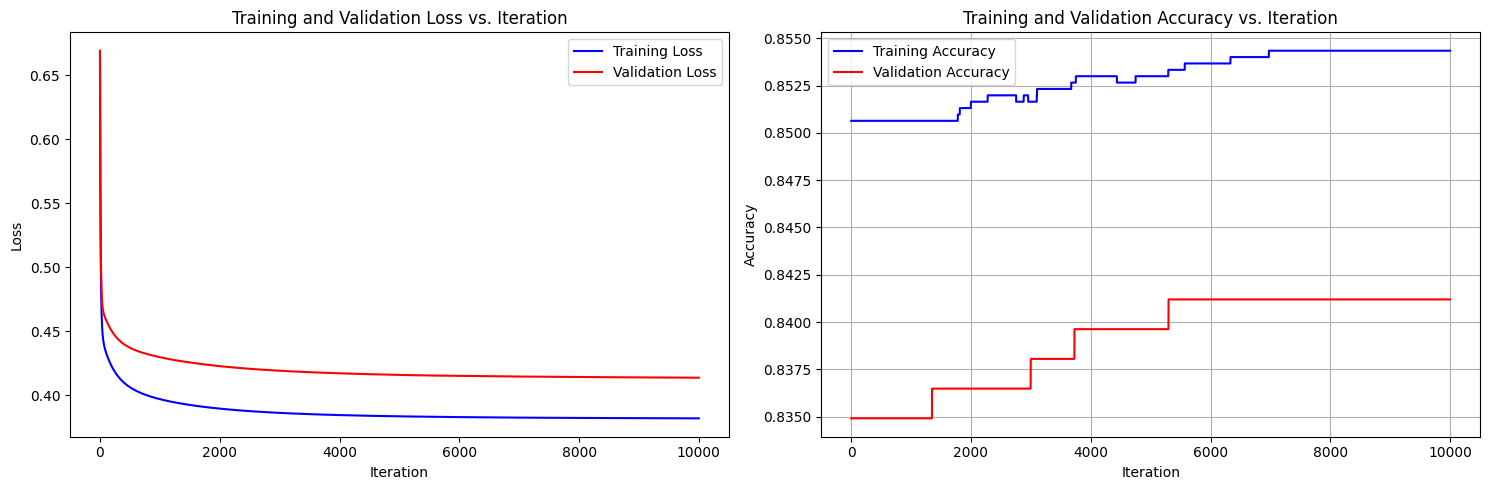

In [45]:
plot_loss_and_accuracy(train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history)

In [60]:
def compute_cost_reg_L2(X, Y, w, b, lambda_=0):
    m = X.shape[0]
    z = np.dot(X, w) + b
    g = sigmoid(z)

    # Cross-entropy loss
    lr = (-Y * np.log(g + 1e-10)) 
    lv = ((1 - Y) * np.log(1 - g + 1e-10))
    total_cost = lr-lv
    # total_cost = (-Y * np.log(g + 1e-10)) - ((1 - Y) * np.log(1 - g + 1e-10))
    total_cost = np.mean(total_cost)

    # L2 regularization term
    reg_cost = lambda_* np.sum(np.abs(w))
    return total_cost + reg_cost

def compute_gradient_function_reg_L2(X, Y, w, b, lambda_=0):
    m, n = X.shape
    z_wb = np.dot(X, w) + b
    f_wb = sigmoid(z_wb)

    error = f_wb - Y
    dj_db = np.sum(error) / m
    dj_dw = np.dot(X.T, error) / m

    # Add regularization to the weight gradients (L2 regularization)
    dj_dw += (lambda_ / m) * w
    return dj_db, dj_dw

def gradient_descent_function_reg_L2(X, Y, val_x, val_y, initial_weights, initial_bias, compute_cost, compute_gradients, 
                              learning_rate, num_iterations, regularization_param, patience=100):
    num_samples = len(X)
    cost_history = []
    weights_history = []
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    weights = initial_weights
    bias = initial_bias

    bt_val_cost = float('inf')
    bt_weights = None
    bt_bias = None
    patience_counter = 0

    for iteration in range(num_iterations):
        gradient_bias, gradient_weights = compute_gradients(X, Y, weights, bias, regularization_param)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        train_cost = compute_cost(X, Y, weights, bias, regularization_param)
        val_cost = compute_cost(val_x, val_y, weights, bias, regularization_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

        # Compute and store accuracies
        train_predictions = predict(X, weights, bias)
        val_predictions = predict(val_x, weights, bias)

        train_accuracy = calculate_accuracy(train_predictions, Y)
        val_accuracy = calculate_accuracy(val_predictions, val_y)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        # Early stopping logic
        if val_cost < bt_val_cost:
            bt_val_cost = val_cost
            bt_weights = weights
            bt_bias = bias
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at iteration {iteration}")
                break

        # Print the cost and accuracies at intervals
        if iteration % math.ceil(num_iterations // 10) == 0 or iteration == (num_iterations - 1):
            print(f"Iteration {iteration}: Train Cost {train_cost:.4f}, Val Cost {val_cost:.4f}, Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}")

    return bt_weights, bt_bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

np.random.seed(1)
initial_w = np.zeros(x.shape[1])
initial_b = 0


# Some gradient descent settings
iterations = 10000
alpha = 0.1

w,b, train_cost_histroy, val_cost_history, train_accuracy_history, val_accuracy_history = gradient_descent_function_reg_L2(x_train ,y_train, val_x, val_y,initial_w, initial_b,
                                   compute_cost_reg_L2, compute_gradient_function_reg_L2, alpha, iterations, 0.01)

x_train_prediction = predict(x_train, w, b)
val_train_prediction = predict(val_x, w, b)
print("Model Accuracy On Training Data:",accuracy_score(y_train,x_train_prediction)*100,"%")
print("Model Accuracy On Validation Data:",accuracy_score(val_y,val_train_prediction)*100,"%")
print("FINAL MODEL WEIGHTS:", w)
print("FINAL BIAS:", b)
print("ALPHA:", alpha) 

Iteration 0: Train Cost 0.6690, Val Cost 0.6702, Train Accuracy 0.8506, Val Accuracy 0.8349
Early stopping at iteration 453
Model Accuracy On Training Data: 85.06405933917735 %
Model Accuracy On Validation Data: 83.49056603773585 %
FINAL MODEL WEIGHTS: [ 0.19100066  0.08444202 -0.43000863 -0.17840089  0.0491165   0.15580543
  0.0345783   0.57938857  0.1673899  -0.22901703 -0.0341605  -0.30143712
 -0.25473664 -0.41255723 -0.0486253 ]
FINAL BIAS: -1.2858093098293157
ALPHA: 0.1
